In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


from imblearn.over_sampling import SMOTE
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score

In [2]:
data = pd.read_csv(r"C:\Users\Dell\Downloads\Employee-Attrition - Employee-Attrition (1).csv")

In [3]:
d = data.copy()

### PREPROCESSING

In [4]:
d.shape

(1470, 35)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
d.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
d.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
d.duplicated().sum()

np.int64(0)

In [9]:
for i in d.columns:
    print(f"Column: {i}")
    print(d[i].value_counts().sort_index())
    print("_" * 40)
    

Column: Age
Age
18     8
19     9
20    11
21    13
22    16
23    14
24    26
25    26
26    39
27    48
28    48
29    68
30    60
31    69
32    61
33    58
34    77
35    78
36    69
37    50
38    58
39    42
40    57
41    40
42    46
43    32
44    33
45    41
46    33
47    24
48    19
49    24
50    30
51    19
52    18
53    19
54    18
55    22
56    14
57     4
58    14
59    10
60     5
Name: count, dtype: int64
________________________________________
Column: Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64
________________________________________
Column: BusinessTravel
BusinessTravel
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: count, dtype: int64
________________________________________
Column: DailyRate
DailyRate
102     1
103     1
104     1
105     1
106     1
       ..
1492    1
1495    3
1496    2
1498    1
1499    1
Name: count, Length: 886, dtype: int64
________________________________________
Column: De

In [10]:
d.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'], axis=1, inplace=True)

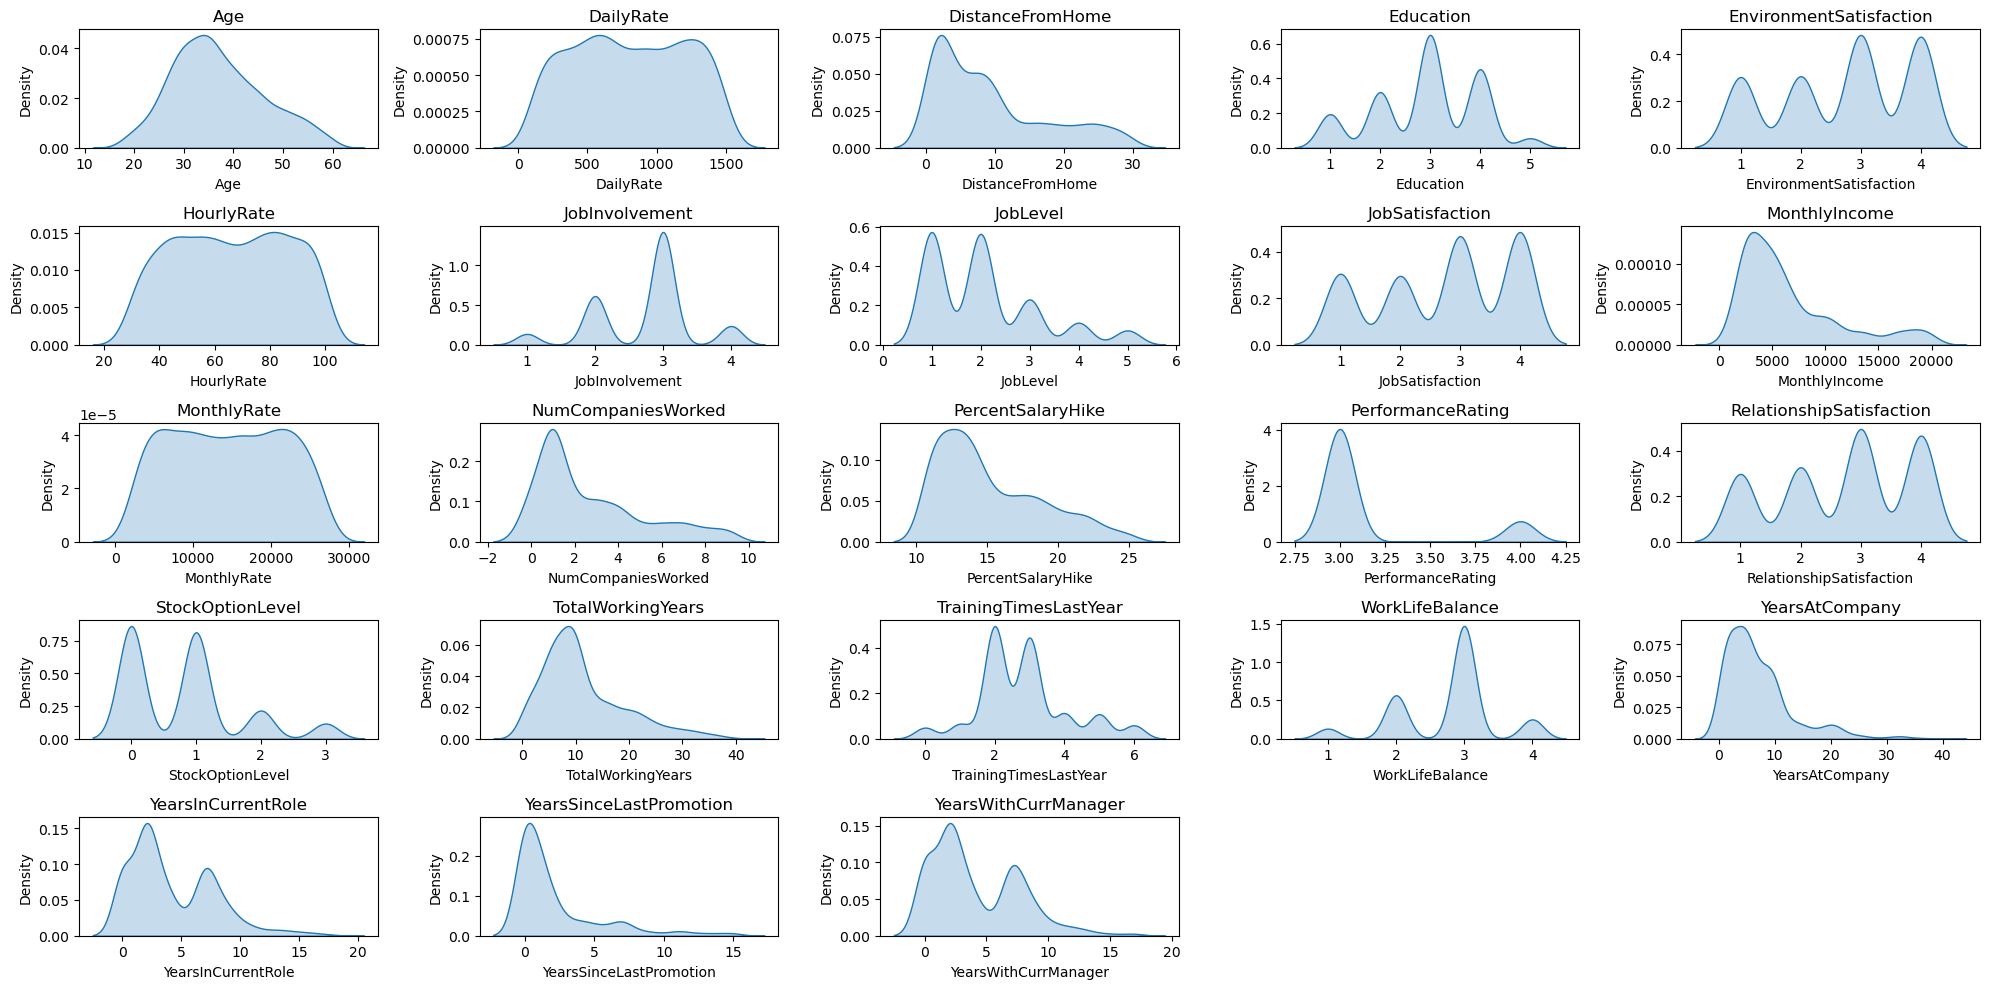

In [11]:
num_col = d.select_dtypes(include = "number").columns
plt.figure(figsize = (20, 10))

for i, col in enumerate(num_col, 1):
    plt.subplot(len(num_col)//5+1, 5, i)
    sns.kdeplot(d[col], fill = True)
    plt.title(col)

plt.tight_layout()
plt.show()
    

In [12]:
log_cols = d.select_dtypes(include = 'number').columns
for col in log_cols:
    d[col] = np.log10(d[col] + 1)

In [13]:
x = d.drop("Attrition", axis=1)
d["Attrition"] = d["Attrition"].map({'No': 0, 'Yes': 1})
y = d["Attrition"]

### TRAIN - TEST SPLIT

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [15]:
encoders = {}
for col in x_train.select_dtypes(include="object"):
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col]  = le.transform(x_test[col])
    encoders[col]= le


In [16]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

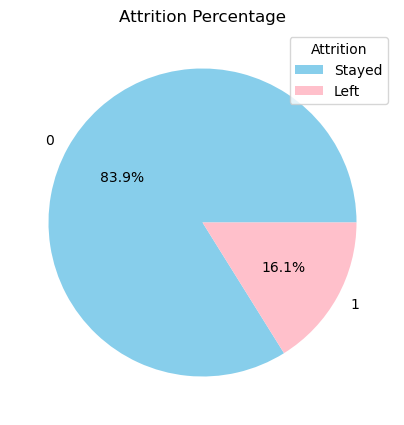

In [53]:
plt.figure(figsize=(5, 5))  
d["Attrition"].value_counts().plot.pie(autopct = "%1.1f%%", colors=["skyblue", "pink"], title = 'Attrition Percentage')
plt.legend(["Stayed", "Left"],  title = "Attrition",  loc = 'upper right')
plt.ylabel('')
plt.show()

In [18]:
st = SMOTE(sampling_strategy = 1, random_state=42)
x_train_st, y_train_st = st.fit_resample(x_train_scaled, y_train)

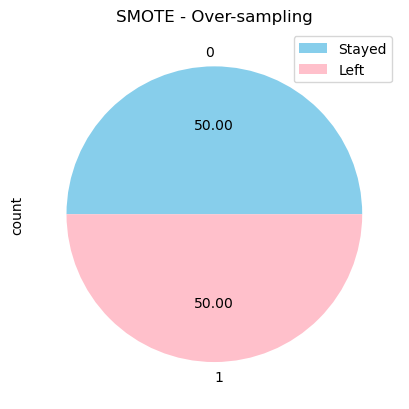

In [51]:
ax = y_train_st.value_counts().plot.pie(autopct='%.2f',  colors=["skyblue", "pink"], startangle = 0)
plt.legend(["Stayed", "Left"])
_ = ax.set_title("SMOTE - Over-sampling")

### MODEL 1 :

In [20]:
LR = LogisticRegression(random_state=42)

param_grid_lr = {
    "penalty"   : ['l1','l2', 'elasticnet'],
    "solver"    : ["liblinear",'saga'],
    "C"         : [0.01,0.1,1,10],
    "max_iter"  : [300,500],
    "class_weight": ["balanced"]
}

grid_search_lr = GridSearchCV(
    estimator  =LR,
    param_grid =param_grid_lr,
    cv         =3,
    scoring    ='roc_auc',
    n_jobs     =-1
)

grid_search_lr.fit(x_train_st, y_train_st)

LR_model = grid_search_lr.best_estimator_

y_pred = LR_model.predict(x_test_scaled)
y_prob = LR_model.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob),2))

print("Best Parameters : ", grid_search_lr.best_params_)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       371
           1       0.43      0.79      0.55        70

    accuracy                           0.80       441
   macro avg       0.69      0.79      0.71       441
weighted avg       0.87      0.80      0.82       441

ROC-AUC: 0.85
Best Parameters :  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l2', 'solver': 'saga'}


In [21]:
y_proba   = LR_model.predict_proba(x_test_scaled)[:, 1]
y_pred_th = (y_proba >= 0.8).astype(int)
print(classification_report(y_test, y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       371
           1       0.76      0.46      0.57        70

    accuracy                           0.89       441
   macro avg       0.83      0.72      0.75       441
weighted avg       0.88      0.89      0.88       441

ROC-AUC: 0.8533692722371968


### MODEL 2 :

In [22]:
RFC = RandomForestClassifier(random_state =40)

param_grid_rf = {
    "n_estimators"       : [50, 100],
    "max_depth"          : [None, 5, 10],
    "min_samples_split"  : [2, 5],
    "min_samples_leaf"   : [1, 4],
    "max_features"       : ['sqrt'],
    "class_weight"       : ["balanced"]    
}

grid_search_rf = GridSearchCV(
    estimator   = RFC,
    param_grid  = param_grid_rf,
    cv          = 3,
    scoring     = 'roc_auc',
    n_jobs      = -1
)

grid_search_rf.fit(x_train_st, y_train_st)

RFC_model = grid_search_rf.best_estimator_

RFC_y_pred = RFC_model.predict(x_test_scaled)
RFC_y_prob = RFC_model.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, RFC_y_pred))
print("ROC-AUC:", roc_auc_score(y_test, RFC_y_prob))

print("Best Parameters : ", grid_search_rf.best_params_)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       371
           1       0.68      0.30      0.42        70

    accuracy                           0.87       441
   macro avg       0.78      0.64      0.67       441
weighted avg       0.85      0.87      0.84       441

ROC-AUC: 0.8079899884482095
Best Parameters :  {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [23]:
RFC_y_proba = RFC_model.predict_proba(x_test_scaled)[:, 1]
RFC_y_pred_th = (y_proba >= 0.6).astype(int)
print(classification_report(y_test, RFC_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, RFC_y_proba))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       371
           1       0.48      0.71      0.57        70

    accuracy                           0.83       441
   macro avg       0.71      0.78      0.73       441
weighted avg       0.87      0.83      0.84       441

ROC-AUC: 0.8079899884482095


### MODEL 3 :

In [24]:
DT = DecisionTreeClassifier(random_state = 20)

param_dt ={
    "criterion"          : ['gini', 'entropy'],
    "max_depth"          : [None, 5, 10],
    "min_samples_split"  : [2, 5],
    "min_samples_leaf"   : [1, 4],
    "class_weight"       : ["balanced"]    
}

grid_search_dt = GridSearchCV(
    estimator = DT,
    param_grid= param_dt,
    cv        = 3,
    n_jobs    = -1,
    scoring   = "roc_auc"
)

grid_search_dt.fit(x_train_st, y_train_st)
DT_model = grid_search_dt.best_estimator_

DT_y_pred = DT_model.predict(x_test_scaled)
DT_y_prob = DT_model.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, DT_y_pred))
print("ROC-AUC:", roc_auc_score(y_test, DT_y_prob))

print("Best Parameters : ", grid_search_dt.best_params_)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       371
           1       0.42      0.53      0.47        70

    accuracy                           0.81       441
   macro avg       0.66      0.69      0.67       441
weighted avg       0.83      0.81      0.82       441

ROC-AUC: 0.7033692722371967
Best Parameters :  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [25]:
DT_y_proba   = DT_model.predict_proba(x_test_scaled)[:, 1]
DT_y_pred_th = (y_proba >= 0.7).astype(int)


print(classification_report(y_test, DT_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, DT_y_proba))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       371
           1       0.60      0.54      0.57        70

    accuracy                           0.87       441
   macro avg       0.76      0.74      0.75       441
weighted avg       0.87      0.87      0.87       441

ROC-AUC: 0.7033692722371967


### MODEL 4 :

In [26]:
ABC = AdaBoostClassifier(random_state = 50)

param_ab = {
    'n_estimators' : [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'algorithm'    : ['SAMME', 'SAMME.R']
}

grid_search_ab = GridSearchCV(
    estimator  = ABC,
    cv         = 5,
    param_grid = param_ab,
    n_jobs     = -1,
    scoring    = 'roc_auc'  
    )

grid_search_ab.fit(x_train_st, y_train_st)

ABC_model = grid_search_ab.best_estimator_

ABC_y_pred = ABC_model.predict(x_test_scaled)
ABC_y_prob = ABC_model.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, ABC_y_pred))
print("ROC-AUC:", roc_auc_score(y_test, ABC_y_prob))

print("Best Parameters : ", grid_search_ab.best_params_)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       371
           1       0.69      0.57      0.62        70

    accuracy                           0.89       441
   macro avg       0.81      0.76      0.78       441
weighted avg       0.88      0.89      0.89       441

ROC-AUC: 0.8360415864458991
Best Parameters :  {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150}


In [27]:
ABC_y_proba = ABC_model.predict_proba(x_test_scaled)[:, 1]
ABC_y_pred_th = (y_proba >= 0.7).astype(int)
print(classification_report(y_test, ABC_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, ABC_y_proba))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       371
           1       0.60      0.54      0.57        70

    accuracy                           0.87       441
   macro avg       0.76      0.74      0.75       441
weighted avg       0.87      0.87      0.87       441

ROC-AUC: 0.8360415864458991


### MODEL 5 :

In [28]:
KNN = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors' : [3, 9, 13, 15],      
    'weights'     : ['uniform', 'distance'],         
    'metric'      : ['euclidean', 'manhattan', 'minkowski']  
}

grid_search_knn= GridSearchCV(
    estimator  = KNN,
    param_grid = param_grid_knn,
    cv         = 3,
    scoring    = 'roc_auc',
    n_jobs     = -1,
)

grid_search_knn.fit(x_train, y_train)

KNN_model = grid_search_knn.best_estimator_

KNN_y_pred = KNN_model.predict(x_test_scaled)
KNN_y_prob = KNN_model.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, KNN_y_pred))
print("ROC-AUC:", roc_auc_score(y_test, KNN_y_prob))

print("Best Parameters : ", grid_search_knn.best_params_)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       371
           1       0.38      0.40      0.39        70

    accuracy                           0.80       441
   macro avg       0.63      0.64      0.64       441
weighted avg       0.81      0.80      0.80       441

ROC-AUC: 0.7042549095109742
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [29]:
KNN_y_proba = KNN_model.predict_proba(x_test_scaled)[:, 1]
KNN_y_pred_th = (y_proba >= 0.7).astype(int)
print(classification_report(y_test, KNN_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, KNN_y_proba))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       371
           1       0.60      0.54      0.57        70

    accuracy                           0.87       441
   macro avg       0.76      0.74      0.75       441
weighted avg       0.87      0.87      0.87       441

ROC-AUC: 0.7042549095109742


### MODEL 6 :

In [30]:
SVM = SVC(random_state = 42)
param_svc = {
    'C'             : [0.1, 1, 10],
    'kernel'        : ['rbf', 'poly', 'linear'],
    'gamma'         : ['scale', 'auto'],
     'class_weight' : ['balanced'],
    'probability'   : [True]
}

grid_search_svc  = GridSearchCV(
    estimator    = SVM,
    param_grid   = param_svc,
    scoring      = 'roc_auc',
    n_jobs       = -1,
    cv           = 3,
   )

grid_search_svc.fit(x_train_st, y_train_st)


SVM_model = grid_search_svc.best_estimator_

SVM_y_pred = SVM_model.predict(x_test_scaled)
SVM_y_prob = SVM_model.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, SVM_y_pred))
print("ROC-AUC:", roc_auc_score(y_test, SVM_y_prob))

print("Best Parameters : ", grid_search_svc.best_params_)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       371
           1       0.50      0.34      0.41        70

    accuracy                           0.84       441
   macro avg       0.69      0.64      0.66       441
weighted avg       0.82      0.84      0.83       441

ROC-AUC: 0.7768964189449364
Best Parameters :  {'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}


In [31]:
SVM_y_proba = SVM_model.predict_proba(x_test_scaled)[:, 1]
SVM_y_pred_th = (y_proba >= 0.6).astype(int)
print(classification_report(y_test, SVM_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, SVM_y_proba))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       371
           1       0.48      0.71      0.57        70

    accuracy                           0.83       441
   macro avg       0.71      0.78      0.73       441
weighted avg       0.87      0.83      0.84       441

ROC-AUC: 0.7768964189449364


### MODEL 7 :

In [32]:
GBC = GradientBoostingClassifier(random_state = 42)

param_gbc = {
    'n_estimators'     : [50, 100],
    'learning_rate'    : [0.01, 1, 0.5],
    'max_depth'        : [3, 7],
    'min_samples_split': [2, 10],
    'min_samples_leaf' : [1, 4]
     }

grid_search_gbc = GridSearchCV(
    estimator  = GBC,
    param_grid = param_gbc,
    cv         = 3,
    scoring    = 'roc_auc',
    n_jobs     = -1
)

grid_search_gbc.fit(x_train_st, y_train_st)

GBC_model = grid_search_gbc.best_estimator_

GBC_y_pred = GBC_model.predict(x_test_scaled)
GBC_y_prob = GBC_model.predict_proba(x_test_scaled)[:,1]

print(classification_report(y_test, GBC_y_pred))
print("ROC-AUC:", roc_auc_score(y_test, GBC_y_prob))

print("Best Parameters : ", grid_search_gbc.best_params_)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       371
           1       0.66      0.33      0.44        70

    accuracy                           0.87       441
   macro avg       0.77      0.65      0.68       441
weighted avg       0.85      0.87      0.85       441

ROC-AUC: 0.8022333461686562
Best Parameters :  {'learning_rate': 0.5, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [33]:
GBC_y_proba = GBC_model.predict_proba(x_test_scaled)[:, 1]
GBC_y_pred_th = (y_proba >= 0.8).astype(int)
print(classification_report(y_test, GBC_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, GBC_y_proba))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       371
           1       0.76      0.46      0.57        70

    accuracy                           0.89       441
   macro avg       0.83      0.72      0.75       441
weighted avg       0.88      0.89      0.88       441

ROC-AUC: 0.8022333461686562


### MODEL 8 :

In [34]:
XGBC = XGBClassifier(random_state = 23, eval_metric='logloss', use_label_encoder=False)

param_xg = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.3],
    'subsample': [0.7, 1.0],          
    'colsample_bytree': [0.7, 1.0],
    'scale_pos_weight': [1, 6]      
}

grid_search_xg = GridSearchCV(
    estimator=XGBC,
    param_grid=param_xg,
    scoring='roc_auc',
    n_jobs=-1,
    cv=3
)


grid_search_xg.fit(x_train, y_train)

XGBC_model = grid_search_xg.best_estimator_

XGBC_y_pred = XGBC_model.predict(x_test)
XGBC_y_prob = XGBC_model.predict_proba(x_test)[:, 1]

print(classification_report(y_test, XGBC_y_pred))
print("ROC-AUC:", roc_auc_score(y_test, XGBC_y_prob))

print("Best Parameters : ", grid_search_xg.best_params_)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       371
           1       0.83      0.27      0.41        70

    accuracy                           0.88       441
   macro avg       0.85      0.63      0.67       441
weighted avg       0.87      0.88      0.85       441

ROC-AUC: 0.8085483249903735
Best Parameters :  {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.7}


In [35]:
XGBC_y_proba = XGBC_model.predict_proba(x_test_scaled)[:, 1]
XGBC_y_pred_th = (y_proba >= 0.5).astype(int)
print(classification_report(y_test, XGBC_y_pred_th))
print("ROC-AUC:", roc_auc_score(y_test, XGBC_y_proba))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       371
           1       0.43      0.79      0.55        70

    accuracy                           0.80       441
   macro avg       0.69      0.79      0.71       441
weighted avg       0.87      0.80      0.82       441

ROC-AUC: 0.7765883711975357


### SAVE MODEL : 

In [36]:
def save_model(model_name, model, grid, folder):
    joblib.dump(model, f"{folder}/{model_name}.pkl")

    if grid is not None:
        joblib.dump(grid.best_params_, f"{folder}/Best_params.pkl")

    y_pred = model.predict(x_test_scaled)
    y_prob = model.predict_proba(x_test_scaled)[:, 1]

    Metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob)
    }

    joblib.dump(Metrics, f"{folder}/Metrics.pkl")

    print(f"{model_name} saved successfully!")
    
all_models = {
    "LogisticRegression": {
        "model": LR_model,
        "grid": grid_search_lr,
        "folder": "models/LogisticRegression"
    },
    "RandomForest": {
        "model": RFC_model,
        "grid": grid_search_rf,
        "folder": "models/RandomForest"
    },
    "XGBoost": {
        "model": XGBC_model,
        "grid": grid_search_xg,
        "folder": "models/XGBC"
    },
    "SVM": {
        "model": SVM_model,
        "grid": grid_search_svc,
        "folder": "models/SVM"
    },
    "KNN": {
        "model": KNN_model,
        "grid": grid_search_knn,
        "folder": "models/KNN"
    },
    "DecisionTree": {
        "model": DT_model,
        "grid": grid_search_dt,
        "folder": "models/DecisionTree"
    },
    "GradientBoosting": {
        "model": GBC_model,
        "grid": grid_search_gbc,
        "folder": "models/GradientBoosting"
    },
    "AdaBoost": {
        "model": ABC_model,
        "grid": grid_search_ab,
        "folder": "models/AdaBoost"
    }
}

for model_name, info in all_models.items():
    save_model(
        model_name=model_name,
        model=info["model"],
        grid=info["grid"],
        folder=info["folder"]
    )

LogisticRegression saved successfully!
RandomForest saved successfully!
XGBoost saved successfully!
SVM saved successfully!
KNN saved successfully!
DecisionTree saved successfully!
GradientBoosting saved successfully!
AdaBoost saved successfully!


In [37]:
joblib.dump(encoders, "models/LogisticRegression/Encoders.pkl")
joblib.dump(scaler, "models/LogisticRegression/Scaler.pkl")

['models/LogisticRegression/Scaler.pkl']

In [38]:
dp = data.copy()

In [39]:
dp["PerformanceRating"]


0       3
1       4
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    4
1468    3
1469    3
Name: PerformanceRating, Length: 1470, dtype: int64

### PERFORMANCE RATING MODEL : 

In [40]:
dp.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'], axis=1, inplace=True)


In [41]:
X = dp.drop("PerformanceRating", axis = 1)
Y = dp["PerformanceRating"]

In [42]:
Y.values

array([3, 4, 3, ..., 4, 3, 3])

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


In [44]:
encoders = {}
for col in X_train.select_dtypes(include="object"):
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])
    encoders[col]= le


In [45]:
LRP = LogisticRegression(random_state=0)


In [46]:
param_grid_lrp = {
    "penalty"   : ['l1','l2'],
    "solver"    : ["liblinear",'saga'],
    "C"         : [0.01,0.1,1,10],
    "max_iter"  : [300,500],
    "class_weight": ["balanced"]
}

grid_search_lrp = GridSearchCV(
    estimator  =LRP,
    param_grid =param_grid_lrp,
    cv         =3,
    scoring    ='f1',
    n_jobs     =-1
)

grid_search_lrp.fit(X_train, Y_train)

LRP_model = grid_search_lrp.best_estimator_

Y_pred = LRP_model.predict(X_test)
Y_prob = LRP_model.predict_proba(X_test)[:,1]

print(classification_report(Y_test, Y_pred))
print("ROC-AUC:", round(roc_auc_score(Y_test, Y_prob),2))

print("Best Parameters : ", grid_search_lrp.best_params_)


              precision    recall  f1-score   support

           3       0.96      0.84      0.90       374
           4       0.47      0.82      0.60        67

    accuracy                           0.83       441
   macro avg       0.72      0.83      0.75       441
weighted avg       0.89      0.83      0.85       441

ROC-AUC: 0.93
Best Parameters :  {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}


In [47]:
import os 

Metrics = {
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred, pos_label = 4),
        "Recall": recall_score(Y_test, Y_pred, pos_label = 4),
        "f1_score": f1_score(Y_test, Y_pred, pos_label = 4),
        "roc_auc": roc_auc_score(Y_test, Y_pred)
    }

os.makedirs("models/LRP", exist_ok = True)

joblib.dump(LRP_model, "models/LRP/LRP_model.pkl")
joblib.dump(grid_search_lrp.best_params_, "models/LRP/Best_parameters.pkl")
joblib.dump(Metrics, "models/LRP/Metrics.pkl")

['models/LRP/Metrics.pkl']

In [48]:
d.shape[1]

31

In [49]:
type(encoders)

dict

In [50]:
encoders.keys()

dict_keys(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])